# **Import Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/Project Portofolio/Gas Emision/data.csv'
df = pd.read_csv(file_path)
df

Mounted at /content/drive


,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF
...,...,...,...,...,...,...,...,...,...,...,...,...
37989,2024,1,SMN,MINNESOTA,EPG0,Natural Gas,VRS,Residential Consumption,N3010MN2,Minnesota Natural Gas Residential Consumption ...,24866.0,MMCF
37990,2024,1,SNE,USA-NE,EPG0,Natural Gas,VRS,Residential Consumption,N3010NE2,Nebraska Natural Gas Residential Consumption (...,7800.0,MMCF
37991,2024,1,SVA,USA-VA,EPG0,Natural Gas,VRS,Residential Consumption,N3010VA2,Virginia Natural Gas Residential Consumption (...,15938.0,MMCF
37992,2024,1,SCT,USA-CT,EPG0,Natural Gas,VRS,Residential Consumption,N3010CT2,Connecticut Natural Gas Residential Consumptio...,9299.0,MMCF


# **Exploratory Data Analysis (EDA)**

In [3]:
df

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF
...,...,...,...,...,...,...,...,...,...,...,...,...
37989,2024,1,SMN,MINNESOTA,EPG0,Natural Gas,VRS,Residential Consumption,N3010MN2,Minnesota Natural Gas Residential Consumption ...,24866.0,MMCF
37990,2024,1,SNE,USA-NE,EPG0,Natural Gas,VRS,Residential Consumption,N3010NE2,Nebraska Natural Gas Residential Consumption (...,7800.0,MMCF
37991,2024,1,SVA,USA-VA,EPG0,Natural Gas,VRS,Residential Consumption,N3010VA2,Virginia Natural Gas Residential Consumption (...,15938.0,MMCF
37992,2024,1,SCT,USA-CT,EPG0,Natural Gas,VRS,Residential Consumption,N3010CT2,Connecticut Natural Gas Residential Consumptio...,9299.0,MMCF


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [5]:
print(df.isnull().sum())

year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
dtype: int64


In [6]:
print(df.nunique())

year                     11
month                    12
duoarea                  52
area-name                52
product                   1
product-name              1
process                   8
process-name              8
series                  314
series-description      314
value                 18923
units                     1
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.describe()

,year,month,value
count,37994.000000,37994.000000,3.751800e+04
mean,2018.545455,6.454545,2.970826e+04
std,2.903442,3.473677,1.504204e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,3.000000,8.092500e+02
50%,2019.000000,6.000000,4.380000e+03
75%,2021.000000,9.000000,1.616350e+04
max,2024.000000,12.000000,3.391775e+06


# **Pre Processing**

In [9]:
df["value"] = df["value"].fillna(df["value"].mean())
print(df.isnull().sum())

year                  0
month                 0
duoarea               0
area-name             0
product               0
product-name          0
process               0
process-name          0
series                0
series-description    0
value                 0
units                 0
dtype: int64


In [10]:
df.drop(["product","product-name","process-name","series-description","units","duoarea"], axis = 1, inplace=True)
df

,year,month,area-name,process,series,value
0,2014,1,FLORIDA,VCS,N3020FL2,6605.0
1,2014,1,USA-NH,VCS,N3020NH2,1691.0
2,2014,1,USA-OR,VCS,N3020OR2,4711.0
3,2014,1,USA-DE,VCS,N3020DE2,2128.0
4,2014,1,USA-AZ,VCS,N3020AZ2,3915.0
...,...,...,...,...,...,...
37989,2024,1,MINNESOTA,VRS,N3010MN2,24866.0
37990,2024,1,USA-NE,VRS,N3010NE2,7800.0
37991,2024,1,USA-VA,VRS,N3010VA2,15938.0
37992,2024,1,USA-CT,VRS,N3010CT2,9299.0


In [11]:
df.describe()

,year,month,value
count,37994.000000,37994.000000,3.799400e+04
mean,2018.545455,6.454545,2.970826e+04
std,2.903442,3.473677,1.494751e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,3.000000,8.482500e+02
50%,2019.000000,6.000000,4.527500e+03
75%,2021.000000,9.000000,1.716475e+04
max,2024.000000,12.000000,3.391775e+06


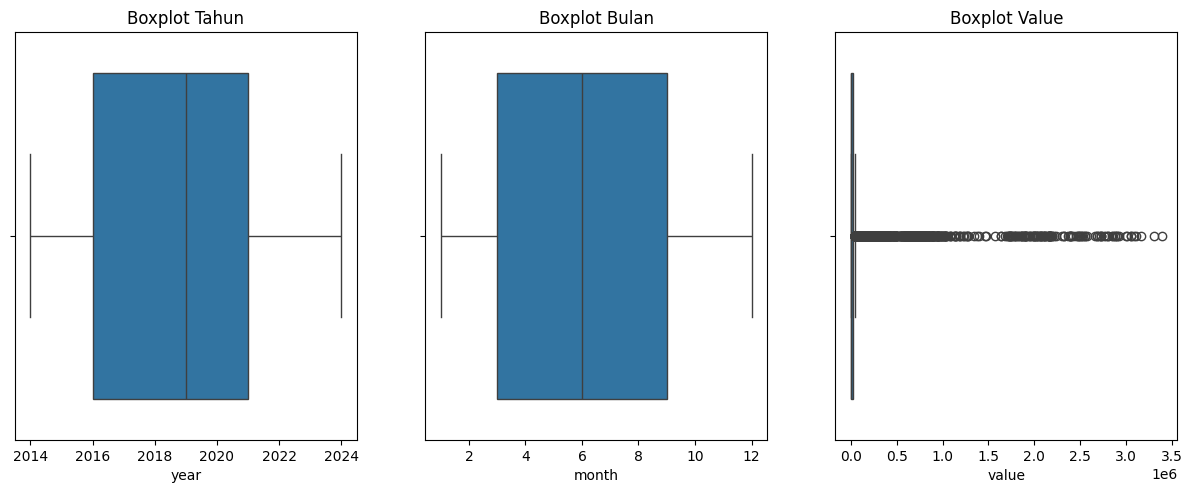

In [12]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 3, 1)
sns.boxplot(x=df["year"])
plt.title('Boxplot Tahun')

plt.subplot(3, 3, 2)
sns.boxplot(x=df["month"])
plt.title('Boxplot Bulan')

plt.subplot(3, 3, 3)
sns.boxplot(x=df["value"])
plt.title('Boxplot Value')

plt.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       37994 non-null  int64  
 1   month      37994 non-null  int64  
 2   area-name  37994 non-null  object 
 3   process    37994 non-null  object 
 4   series     37994 non-null  object 
 5   value      37994 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ MB


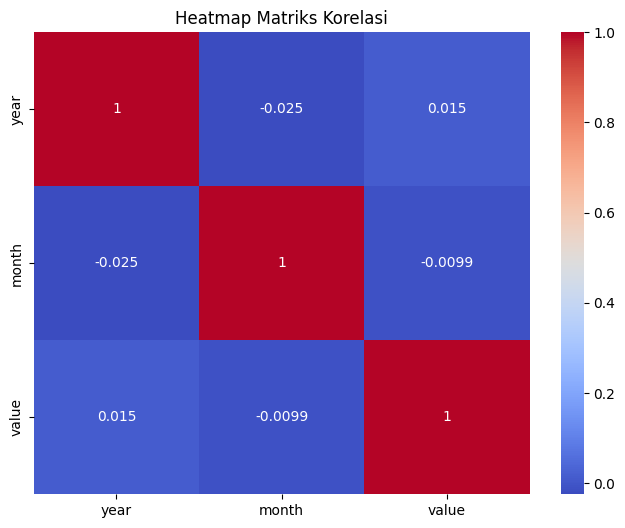

In [14]:
selected_df = df[["year", "month", "value"]]
correlation_matrix = selected_df.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Heatmap Matriks Korelasi')
plt.show()

In [15]:
# Buat salinan dataset untuk menghindari perubahan langsung
df_encoded = df.copy()

# Pilih kolom kategori yang ingin diencode
category_cols = ["area-name", "process", "series"]
target_col = "value"  # Ganti dengan nama target sebenarnya

# Inisialisasi K-Fold untuk menghindari data leakage
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop untuk setiap kolom kategori
for col in category_cols:
    df_encoded[f"{col}_encoded"] = 0  # Buat kolom encoding awal

    for train_idx, val_idx in kf.split(df):
        train_fold, val_fold = df.iloc[train_idx], df.iloc[val_idx]

        # Hitung rata-rata target untuk setiap kategori
        mean_encoded = train_fold.groupby(col)[target_col].mean().to_dict()

        # Gunakan .apply() agar nilai yang tidak ditemukan tidak menyebabkan error
        df_encoded.loc[val_idx, f"{col}_encoded"] = df.loc[val_idx, col].apply(lambda x: mean_encoded.get(x, np.nan))

# Hapus kolom kategori asli jika tidak diperlukan
df_encoded.drop(columns=category_cols, inplace=True)

# Cek hasil
df_encoded.head()

<ipython-input-15-34fbc7477a51>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[10677.83109491  5083.1945534   1811.52803531 ... 30956.33075503
 18904.1208981  16480.70562683]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_encoded.loc[val_idx, f"{col}_encoded"] = df.loc[val_idx, col].apply(lambda x: mean_encoded.get(x, np.nan))
<ipython-input-15-34fbc7477a51>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[10972.5115894  10972.5115894    163.33761867 ... 26994.96213085
 26994.96213085 26994.96213085]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_encoded.loc[val_idx, f"{col}_encoded"] = df.loc[val_idx, col].apply(lambda x: mean_encoded.get(x, np.nan))
<ipython-input-15-34fbc7477a51>:22: FutureWarning: Setting an item of incomp

,year,month,value,area-name_encoded,process_encoded,series_encoded
0,2014,1,6605.0,40212.458702,10668.234942,5105.794118
1,2014,1,1691.0,2344.582711,10907.058322,796.733333
2,2014,1,4711.0,6974.410035,10759.563074,2416.010204
3,2014,1,2128.0,2583.109541,10552.511506,1025.180851
4,2014,1,3915.0,10677.831095,10972.511589,2744.989899


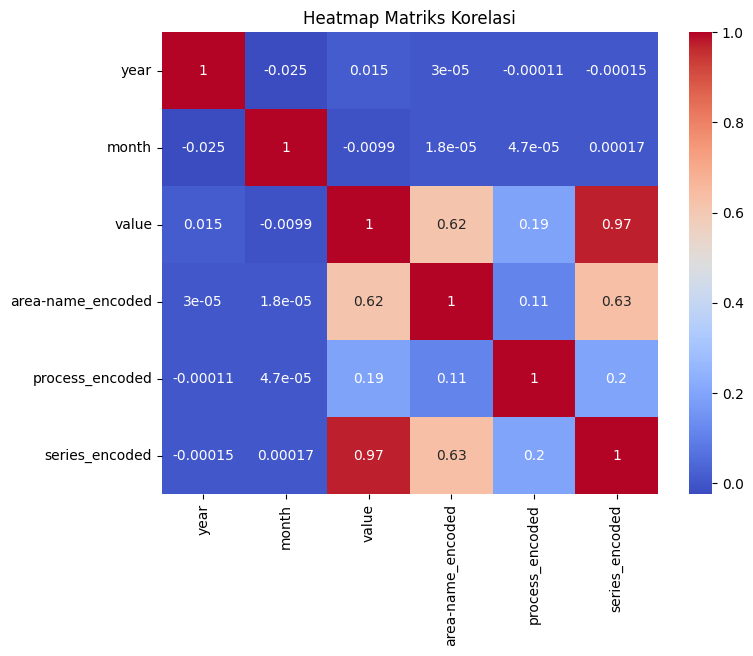

In [16]:
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Heatmap Matriks Korelasi')
plt.show()

In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               37994 non-null  int64  
 1   month              37994 non-null  int64  
 2   value              37994 non-null  float64
 3   area-name_encoded  37994 non-null  float64
 4   process_encoded    37994 non-null  float64
 5   series_encoded     37994 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.7 MB


# **Pemodelan**

In [18]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop("value", axis=1)
y = df_encoded["value"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
def evaluate_print(true, predict):
  #Evaluasi data latih
  mae = mean_absolute_error(true, predict)
  mse = mean_squared_error(true, predict)
  rmse = np.sqrt(mse)
  # mape = np.mean(np.abs((true - predict) / true)) * 100
  r2 = ((r2_score(true, predict)*100),'%')

  #Cetak Hasil Evaluasi
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f'MAE: Rp {mae:,.2f}')
  # print(f'MAPE: {mape:.2f}%')
  print(f"R2: {r2}")
  print("")

def evaluate_model(true, predict):
  #Evaluasi data latih
  mae = mean_absolute_error(true, predict)
  mse = mean_squared_error(true, predict)
  rmse = np.sqrt(mse)
  # mape = np.mean(np.abs((true - predict) / true)) * 100
  r2 = ((r2_score(true, predict)*100),'%')

  return mae, mse, rmse, r2
result = []

In [20]:
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Evaluasi model
print("Evaluasi Train Set")
print("------------------------------------------------------------------")
evaluate_print(y_train, model.predict(x_train))

print("")
print("Evaluasi Test Set")
print("------------------------------------------------------------------")
evaluate_print(y_test, model.predict(x_test))

#Menambahkan hasil evaluasi ke list
result.append(["Linear Regression", *evaluate_model(y_test, pred)])
result_dataset = pd.DataFrame(result, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

Evaluasi Train Set
------------------------------------------------------------------
MSE: 1269114643.310143
RMSE: 35624.63534283745
MAE: Rp 8,010.85
R2: (94.72288271351746, '%')


Evaluasi Test Set
------------------------------------------------------------------
MSE: 831118555.9016707
RMSE: 28829.126866793427
MAE: Rp 7,373.82
R2: (95.47152688425953, '%')



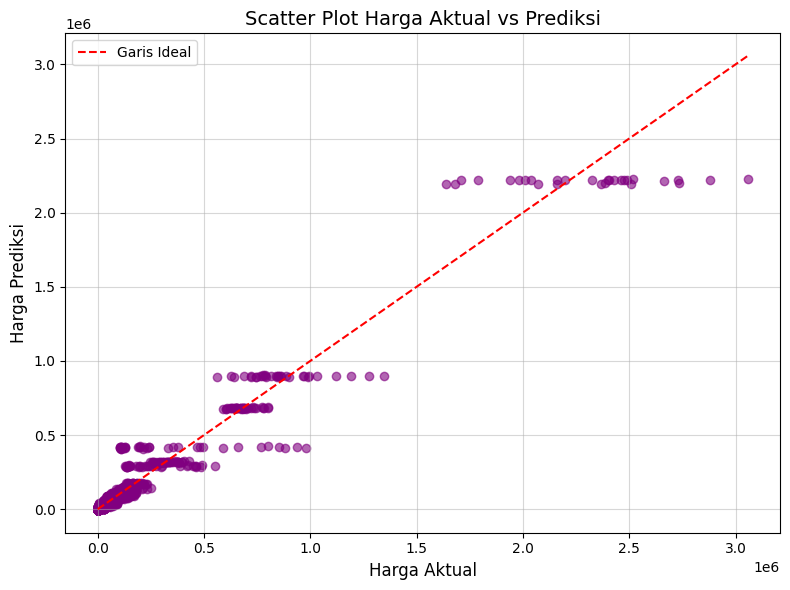

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Ideal')

plt.title("Scatter Plot Harga Aktual vs Prediksi", fontsize=14)
plt.xlabel("Harga Aktual", fontsize=12)
plt.ylabel("Harga Prediksi", fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

In [22]:
# Pemodelan dengan XGBoost Tuning
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', reg_alpha=5, reg_lambda=5,
                         n_estimators=700,
                         max_depth=6,
                         learning_rate=0.05,
                         subsample=1,
                         colsample_bytree=0.8,
                         gamma=0.8)

# Melatih model
model_xgb.fit(x_train, y_train)
pred1 = model_xgb.predict(x_test)

# Evaluasi model
print("Evaluasi Train Set")
print("------------------------------------------------------------------")
evaluate_print(y_train, model_xgb.predict(x_train))

print("")
print("Evaluasi Test Set")
print("------------------------------------------------------------------")
evaluate_print(y_test, model_xgb.predict(x_test))

result.append(["XGBoost Regression", *evaluate_model(y_test, pred1)])
result_dataset = pd.DataFrame(result, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
# result_dataset = pd.DataFrame(result, columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE','R2'])

Evaluasi Train Set
------------------------------------------------------------------
MSE: 18162489.86127748
RMSE: 4261.7472779691525
MAE: Rp 1,894.05
R2: (99.92447838363717, '%')


Evaluasi Test Set
------------------------------------------------------------------
MSE: 84849082.89177065
RMSE: 9211.356191776033
MAE: Rp 2,771.87
R2: (99.5376871469874, '%')



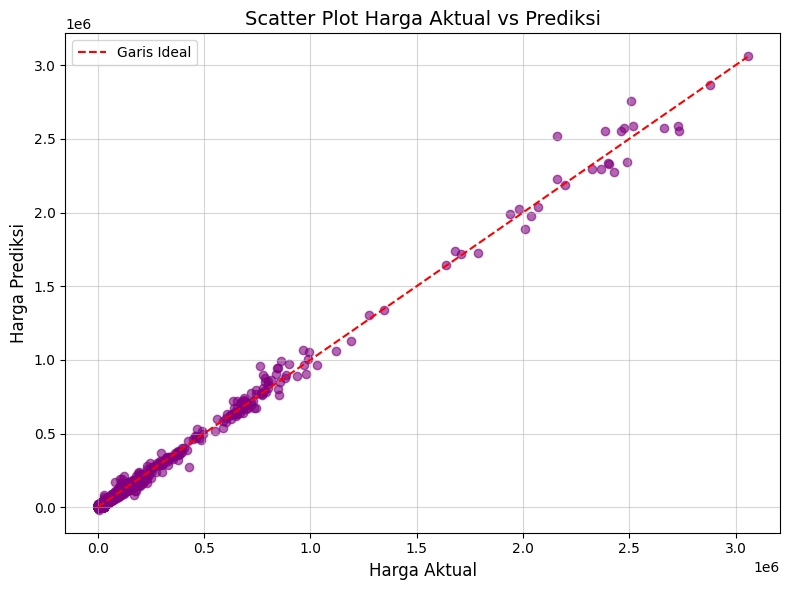

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred1, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Ideal')

plt.title("Scatter Plot Harga Aktual vs Prediksi", fontsize=14)
plt.xlabel("Harga Aktual", fontsize=12)
plt.ylabel("Harga Prediksi", fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Inisialisasi model
model_rf = RandomForestRegressor(n_estimators=100,
                                 max_depth=10,
                                 random_state=42)

# Latih model
model_rf.fit(x_train, y_train)
pred4 = model_rf.predict(x_test)

# Evaluasi model
print("Evaluasi Train Set")
print("------------------------------------------------------------------")
evaluate_print(y_train, model_rf.predict(x_train))

print("")
print("Evaluasi Test Set")
print("------------------------------------------------------------------")
evaluate_print(y_test, model_rf.predict(x_test))

# #Menambahkan hasil evaluasi ke list
result.append(["Random Forest", *evaluate_model(y_test, pred4)])
result_dataset = pd.DataFrame(result, columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])
# result_dataset = pd.DataFrame(result, columns=['Model', 'MAE', 'MSE', 'RMSE', 'MAPE','R2'])

Evaluasi Train Set
------------------------------------------------------------------
MSE: 34766902.42232585
RMSE: 5896.346531736906
MAE: Rp 2,463.95
R2: (99.85543542284582, '%')


Evaluasi Test Set
------------------------------------------------------------------
MSE: 106643809.8305364
RMSE: 10326.848978780332
MAE: Rp 3,004.20
R2: (99.41893533437742, '%')



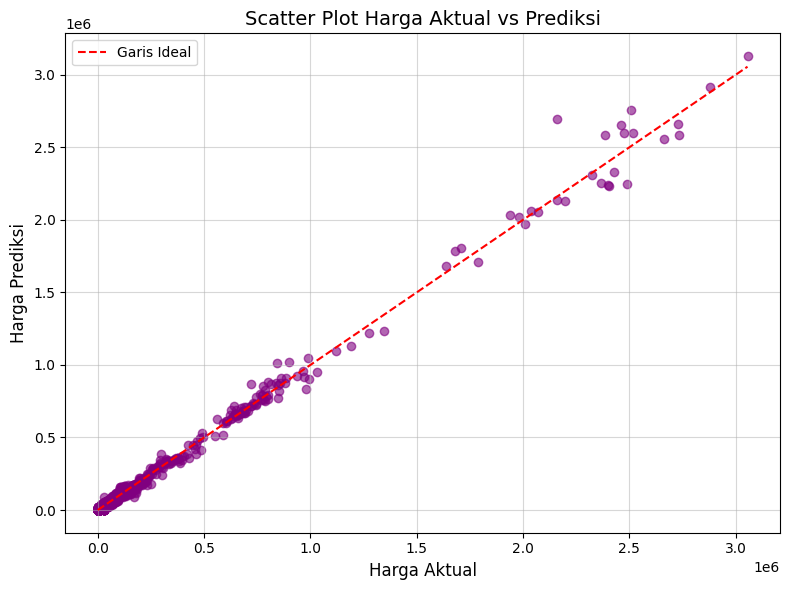

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred4, alpha=0.6, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Garis Ideal')

plt.title("Scatter Plot Harga Aktual vs Prediksi", fontsize=14)
plt.xlabel("Harga Aktual", fontsize=12)
plt.ylabel("Harga Prediksi", fontsize=12)
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.tight_layout()

plt.show()

In [26]:
result_dataset

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,7373.818900,8.311186e+08,28829.126867,"(95.47152688425953, %)"
1,XGBoost Regression,2771.868572,8.484908e+07,9211.356192,"(99.5376871469874, %)"
2,Random Forest,3004.195908,1.066438e+08,10326.848979,"(99.41893533437742, %)"
